In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
database = automap_base()

# reflect the tables
database.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found
database.classes.keys()


['measurement', 'station']

In [6]:
# Save references to each table
measurement = database.classes.measurement
station = database.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
#order by desc
recent_data = session.query(measurement.date).order_by(measurement.date.desc()).first().date
recent_data

'2017-08-23'

In [26]:
#starting date
start_date = session.query(measurement.date).order_by(measurement.date).first().date
start_date

'2010-01-01'

In [32]:
latest_date=dt.datetime.strptime(start_date,"%Y-%m-%d")
latest_date

datetime.datetime(2010, 1, 1, 0, 0)

In [33]:
# Calculate the date one year from the last date in data set.
one_year = dt.datetime.strptime(recent_data, '%Y-%m-%d') - dt.timedelta(days=365)
one_year

datetime.datetime(2016, 8, 23, 0, 0)

In [36]:
# Perform a query to retrieve the data and precipitation scores

results_data=session.query(measurement.date, measurement.prcp).order_by(measurement.date.asc()).\
        filter(measurement.date>=one_year).all()

results_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [38]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results_data)
results_df 


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


<function matplotlib.pyplot.show(close=None, block=None)>

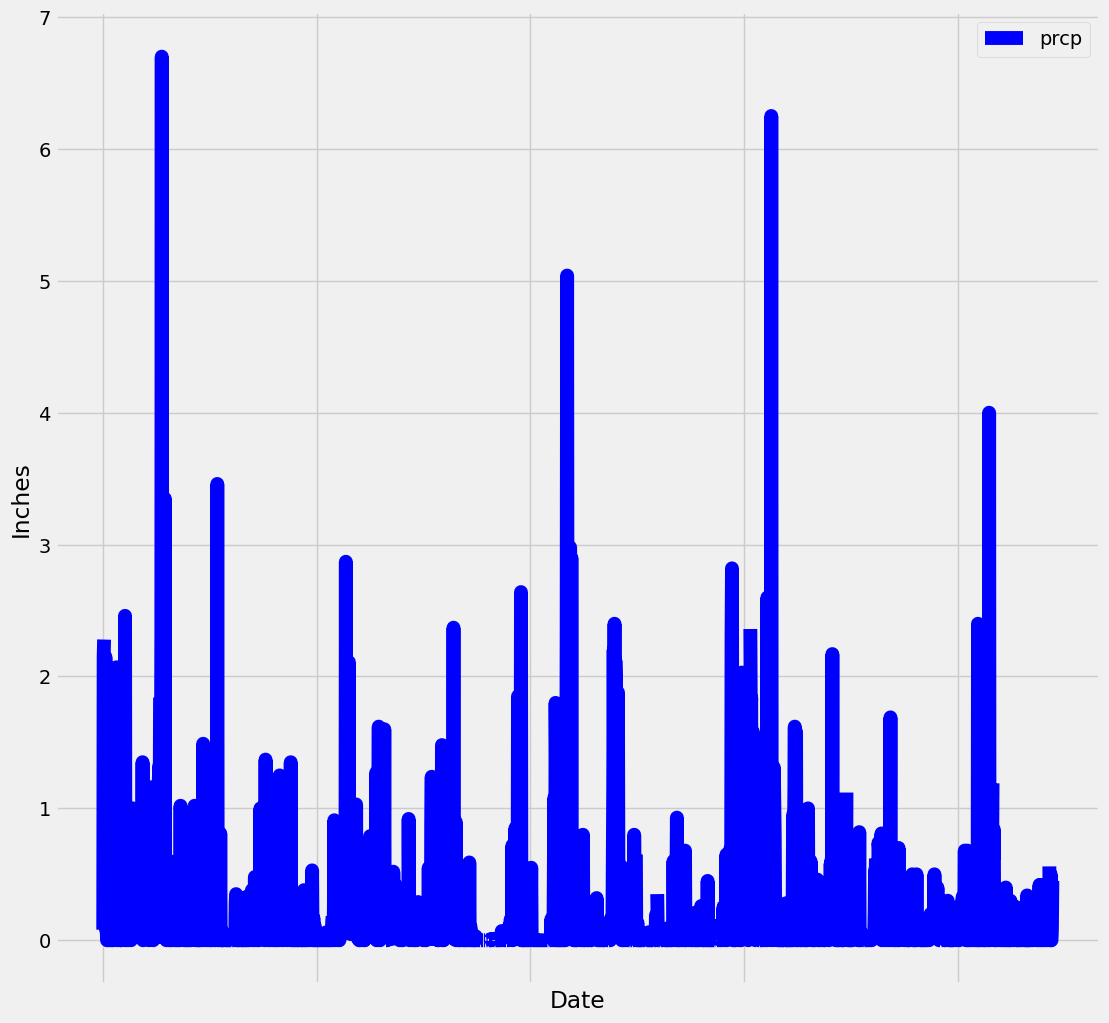

In [51]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df = pd.DataFrame(results_data)

# Sort the dataframe by date
results_df.sort_values(by=['date'], ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
ax = results_df.plot(color='b', linewidth=10, legend=True, figsize=(12,12), grid=True)
plt.setp(ax.get_xticklabels(), visible=False)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.show

In [52]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
stations_num = session.query(func.count(station.id)).all()
stations_num

[(9,)]

In [61]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = most_active[0][0]

active_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == active_station).all()

active_temp



[(54.0, 85.0, 71.66378066378067)]

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

year_temp = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == active_station).\
                filter(measurement.date >= one_year).all()

year_df = pd.DataFrame(year_temp)
year_df.set_index('station', inplace=True)
year_df

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0
...,...
USC00519281,77.0
USC00519281,77.0
USC00519281,76.0


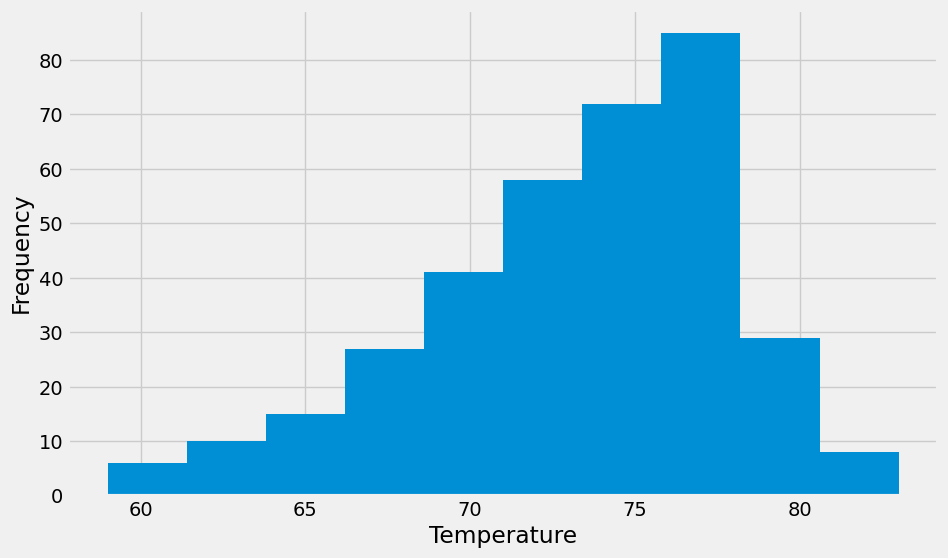

In [122]:
#plot the results as a histogram
year_plot = year_df['tobs'].hist(bins=10, figsize=(10,6))
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()


# Close Session

In [123]:
# Close Session
session.close()